In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.model_selection import train_test_split


In [170]:
df = pd.read_csv("C:\Code Files\Project\Bangalore_Housing_Price\BHP.csv")

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Manan\AppData\Local\Temp\ipykernel_28092\2935885803.py:1: SyntaxWarning: invalid escape sequence '\C'
  df = pd.read_csv("C:\Code Files\Project\Bangalore_Housing_Price\BHP.csv")


In [171]:
df.shape

(13320, 9)

In [172]:
df.head()

,\area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [173]:
print(df.columns.tolist())

['\\area_type', 'availability', 'location', 'size', 'society', 'total_sqft', 'bath', 'balcony', 'price']



DROP THE FEATURES WHICH ARE IRRELEVANT TO US

In [174]:
df = df.drop(
    ['\\area_type', "availability", "society",'balcony'], axis=1
)  # no use as what do we have to do with what society it is in

FILL THE VALUES WHICH ARE NOT PRESENT IN THE DATA


In [175]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [176]:
df = df.dropna()

In [177]:
df["size"] = df["size"].str.extract('(\d+)')
df["size"] = df["size"].astype(int)
df.rename(columns={'size': 'bhk'}, inplace = True)
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Manan\AppData\Local\Temp\ipykernel_28092\3505822511.py:1: SyntaxWarning: invalid escape sequence '\d'
  df["size"] = df["size"].str.extract('(\d+)')


,location,bhk,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00


Feature Engineering


In [178]:
def convert_sqft(val):
    try:
        if "-" in val:  # for values like 1100 - 1200
            token = val.split("-")  # splits those two parts into 1100 and 1200 separate 
            return (float(token[0]) + float(token[1])) / 2 # takes the avg 
        return float(val) # if the value is 1100 then simply converts into a a float value 1100.00
    except:
        return None

df['total_sqft'] = df['total_sqft'].apply(convert_sqft)
df = df.dropna(subset=['total_sqft'])

In [179]:
df = df.reset_index(drop=True) # when we drop from the main dataframe, sometimes what happens is few rows dissapear and the indexes go missing, so we reset them

In [180]:
df.shape

(13200, 5)

In [181]:
df = df[(df["bhk"] <= 10) & (df["price"] <= 500)]  # or try 1000 for broader view

In [182]:
df.head()

,location,bhk,total_sqft,bath,price
0,Electronic City Phase II,2,1056.0,2.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,120.00
2,Uttarahalli,3,1440.0,2.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,95.00
4,Kothanur,2,1200.0,2.0,51.00


In [183]:
# # BHK vs Price

# plt.figure(figsize = (16, 5))
# plt.subplot(1, 2, 1)
# plt.scatter(df['BHK'] , df["price"], alpha=0.3)
# plt.xlim(0.5, 10.5)
# plt.xticks(range(1, 11))
# plt.xlabel('BHK')
# plt.ylabel('Price')
# plt.title("BHK vs Price")
# plt.grid(True, axis = 'y', linestyle = '--', alpha = 0.3)
# plt.show()


# avg_price = df.groupby('BHK')['price'].mean().reset_index()
# plt.figure(figsize=(16, 5))
# sns.barplot(data = avg_price, x ='BHK', y = 'price',color= 'red')
# plt.xlim(0.5, 10.5)
# plt.xticks(range(1, 11))
# plt.xlabel("BHK")
# plt.ylabel("Price")
# plt.title("BHK vs Price")
# plt.grid(True, axis="y", linestyle="--", alpha=0.3)
# plt.tight_layout()
# plt.show()

# df["price_per_sqft"] = (df["price"] * 100000 / df["total_sqft"])  # assuming price in lakhs

# plt.figure(figsize=(10, 5))
# sns.boxplot(x="BHK", y="price_per_sqft", data=df)
# plt.title("Price per Sqft across BHKs")
# plt.grid(True, axis="y", linestyle="--", alpha=0.3)
# plt.show()

In [184]:
df.loc[30]

location      Yelahanka
bhk                   4
total_sqft       2475.0
bath                4.0
price             186.0
Name: 30, dtype: object

In [185]:
df.shape

(12951, 5)

In [186]:
df2 = df.copy()

df2["price_per_sqft"] = df2["price"] * 100000 / df2["total_sqft"]

In [187]:
df2.shape

(12951, 6)

In [188]:
df2.head(10)

,location,bhk,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000
5,Whitefield,2,1170.0,2.0,38.00,3247.863248
6,Old Airport Road,4,2732.0,4.0,204.00,7467.057101
8,Marathahalli,3,1310.0,3.0,63.25,4828.244275
9,Gandhi Bazar,6,1020.0,6.0,370.00,36274.509804
10,Whitefield,3,1800.0,2.0,70.00,3888.888889


In [189]:
len(df.location.unique())

1271

In [190]:
df2['location'] = df2['location'].apply(lambda x: x.strip()) #a small anonymous function, strip basically takes the spaces off

In [191]:
location_stats = df2.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield                513
Sarjapur  Road            384
Electronic City           303
Kanakpura Road            264
Thanisandra               235
                         ... 
6th Block Jayanagar         1
6th Block Rajaji Nagar      1
7th Block Koramangala       1
Vijaypura                   1
3rd Phase Iti Layout        1
Name: location, Length: 1260, dtype: int64

In [192]:
location_stats.head(15)

location
Whitefield                  513
Sarjapur  Road              384
Electronic City             303
Kanakpura Road              264
Thanisandra                 235
Yelahanka                   209
Uttarahalli                 186
Marathahalli                174
Hebbal                      172
Raja Rajeshwari Nagar       171
Bannerghatta Road           150
Hennur Road                 149
7th Phase JP Nagar          148
Haralur Road                141
Electronic City Phase II    131
Name: location, dtype: int64

In [193]:
location_stats[location_stats <= 10].count()
len(location_stats[location_stats <= 10])

1024

In [194]:
location_under10 = location_stats[location_stats <= 10]
location_under10.shape

(1024,)

In [195]:
df2.head()

,location,bhk,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000


put all these 1036 in other as they are less than 10

In [196]:
df2['location'] = df2.location.apply(lambda x: 'other_lessthan10' if x in location_under10 else x)

len(df2.location.unique())

237

In [197]:
df3 = df2.copy()

In [198]:
df3.head(10)

,location,bhk,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000
5,Whitefield,2,1170.0,2.0,38.00,3247.863248
6,Old Airport Road,4,2732.0,4.0,204.00,7467.057101
8,Marathahalli,3,1310.0,3.0,63.25,4828.244275
9,other_lessthan10,6,1020.0,6.0,370.00,36274.509804
10,Whitefield,3,1800.0,2.0,70.00,3888.888889


In [199]:
df3.shape

(12951, 6)

finding the worth of the house, finding the size of bedroom, larger the value the better

In [200]:
df3[(df3.total_sqft / df3.bhk) <= 300].head() 

,location,bhk,total_sqft,bath,price,price_per_sqft
9,other_lessthan10,6,1020.0,6.0,370.0,36274.509804
45,HSR Layout,8,600.0,9.0,200.0,33333.333333
57,Murugeshpalya,6,1407.0,4.0,150.0,10660.980810
67,Devarachikkanahalli,8,1350.0,7.0,85.0,6296.296296
69,other_lessthan10,3,500.0,3.0,100.0,20000.000000


In [201]:
len(df3[(df3.total_sqft / df3.bhk) <= 300])

915

OUTLIER REMOVAL

In [202]:
df4 = df3[~((df3.total_sqft / df3.bhk) <= 300)]
df4.shape

(12036, 6)

In [203]:
df4.price_per_sqft.describe()

count    12036.000000
mean      5920.209790
std       2898.187358
min        267.829813
25%       4186.046512
50%       5217.391304
75%       6706.013851
max      76923.076923
Name: price_per_sqft, dtype: float64

In [204]:
def remove_pps_outlier(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft) #mean
        st = np.std(subdf.price_per_sqft) #standard deviation
        reduced_df = subdf[(subdf.price_per_sqft > (m - st)) & (subdf.price_per_sqft <=(m+st))] #removes the extreme outliers which are too far from the mean
        df_out = pd.concat([df_out, reduced_df], ignore_index= True) #combines these 2 dataframes
    return df_out

df5 = remove_pps_outlier(df4)
df5.shape

(9411, 6)

In [205]:
df5.head(10)

,location,bhk,total_sqft,bath,price,price_per_sqft
0,1st Block Jayanagar,4,2850.0,4.0,428.0,15017.543860
1,1st Block Jayanagar,3,1630.0,3.0,194.0,11901.840491
2,1st Block Jayanagar,3,1875.0,2.0,235.0,12533.333333
3,1st Block Jayanagar,3,1200.0,2.0,130.0,10833.333333
4,1st Block Jayanagar,2,1235.0,2.0,148.0,11983.805668
5,1st Block Jayanagar,4,2750.0,4.0,413.0,15018.181818
6,1st Block Jayanagar,4,2450.0,4.0,368.0,15020.408163
7,1st Phase JP Nagar,4,2825.0,4.0,250.0,8849.557522
8,1st Phase JP Nagar,3,1875.0,3.0,167.0,8906.666667
9,1st Phase JP Nagar,3,2065.0,4.0,210.0,10169.491525


In [206]:
matplotlib.rcParams["figure.figsize"] = (10,6) #rcParams makes the same size of plots, where are plt.figure only does for that specific 

def plot_scatter(df, location):

    bhk_2 = df[(df.location == location) & (df.bhk == 2)]
    bhk_3 = df[(df.location == location) & (df.bhk == 3)]
    
    print(f"2 BHK: {len(bhk_2)} points, 3 BHK: {len(bhk_3)} points")
    
    if bhk_2.empty and bhk_3.empty:
        print("No data to plot for this location.")
        return

    matplotlib.rcParams["figure.figsize"] = (10, 5)
    plt.scatter(bhk_2.total_sqft, bhk_2.price, color="blue", label="2 BHK", s=50)
    plt.scatter(bhk_3.total_sqft, bhk_3.price, marker="+", color="red", label="3 BHK", s=50)
    plt.xlabel('Total Sqft per Area')
    plt.ylabel('Price (in Lakhs)')
    plt.title(location)
    plt.legend()
    plt.show()




2 BHK: 67 points, 3 BHK: 49 points


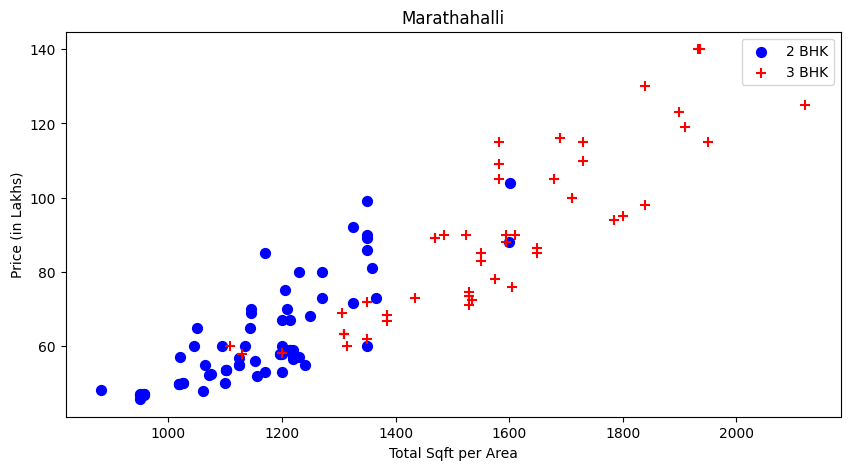

In [207]:
plot_scatter(df5,"Marathahalli")

2 BHK: 12 points, 3 BHK: 31 points


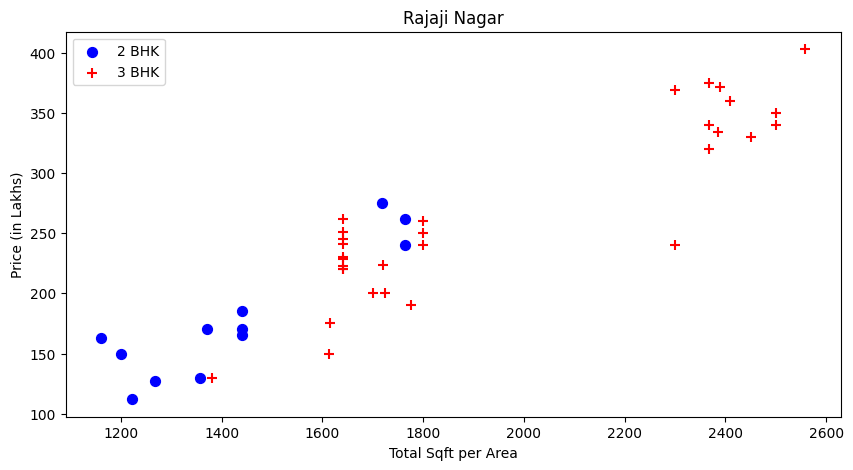

In [208]:
plot_scatter(df5, "Rajaji Nagar")

2 BHK: 35 points, 3 BHK: 56 points


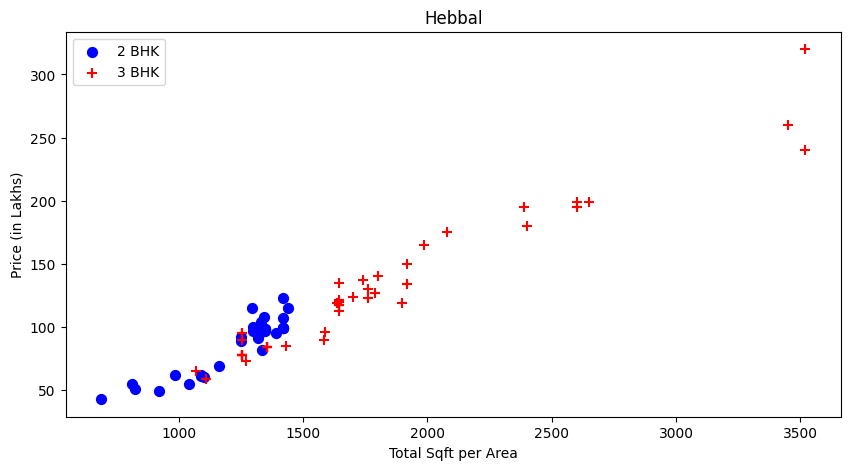

In [209]:
plot_scatter(df5, "Hebbal")

2 BHK: 186 points, 3 BHK: 144 points


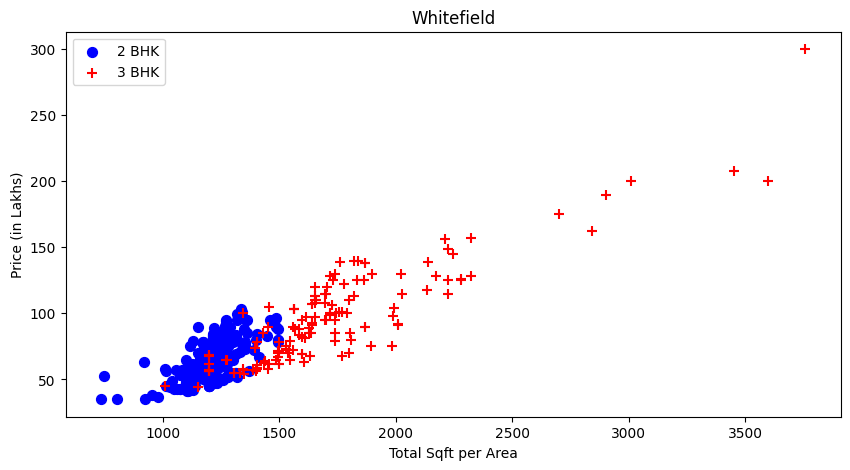

In [210]:
plot_scatter(df5, "Whitefield")

In [211]:
df5.shape

(9411, 6)

In [212]:
def outlier_removal(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }

        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk - 1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis = 'index')

df6 = outlier_removal(df5)  
df6.shape


(6740, 6)

Text(0, 0.5, 'Count')

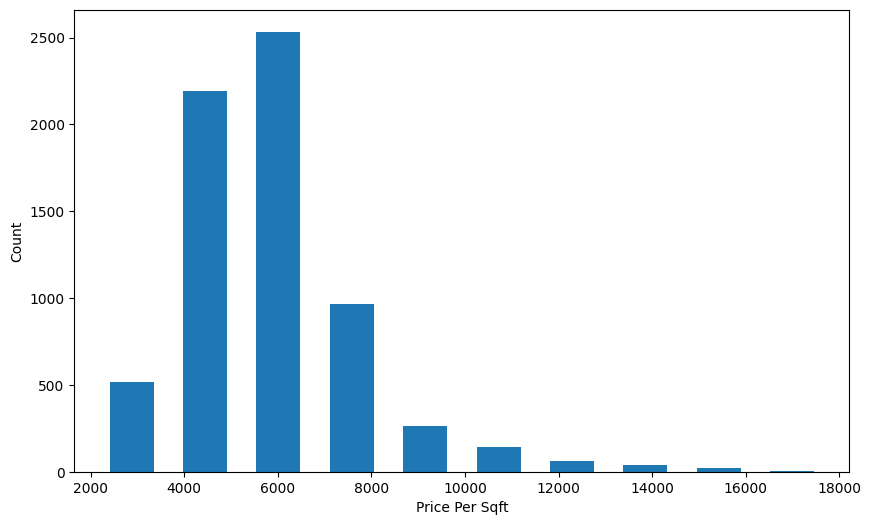

In [213]:
matplotlib.rcParams["figure.figsize"] = (10,6)
plt.hist(df6.price_per_sqft, rwidth=0.6)
plt.xlabel("Price Per Sqft")
plt.ylabel("Count")


In [214]:
df6.head()

,location,bhk,total_sqft,bath,price,price_per_sqft
0,1st Block Jayanagar,4,2850.0,4.0,428.0,15017.543860
1,1st Block Jayanagar,3,1630.0,3.0,194.0,11901.840491
2,1st Block Jayanagar,3,1875.0,2.0,235.0,12533.333333
3,1st Block Jayanagar,3,1200.0,2.0,130.0,10833.333333
4,1st Block Jayanagar,2,1235.0,2.0,148.0,11983.805668


In [215]:
df6.bath.unique()

array([ 4.,  3.,  2.,  8.,  5.,  1.,  6.,  7.,  9., 12.])

In [216]:
df6[df6.bath > df6.bhk + 2]

,location,bhk,total_sqft,bath,price,price_per_sqft
1514,Chikkabanavar,4,2460.0,7.0,80.0,3252.032520
4854,Nagasandra,4,7000.0,8.0,450.0,6428.571429
6244,Thanisandra,3,1806.0,6.0,116.0,6423.034330


In [217]:
df6.shape

(6740, 6)

In [218]:
df7 = df6[df6.bath < df6.bhk + 2]

In [219]:
df7.shape

(6681, 6)

In [220]:
df7.head()

,location,bhk,total_sqft,bath,price,price_per_sqft
0,1st Block Jayanagar,4,2850.0,4.0,428.0,15017.543860
1,1st Block Jayanagar,3,1630.0,3.0,194.0,11901.840491
2,1st Block Jayanagar,3,1875.0,2.0,235.0,12533.333333
3,1st Block Jayanagar,3,1200.0,2.0,130.0,10833.333333
4,1st Block Jayanagar,2,1235.0,2.0,148.0,11983.805668


In [221]:
df8 = df7.drop(["price_per_sqft"], axis=1)

In [222]:
df8.shape

(6681, 5)

In [223]:
len(df8.location.unique())

237

In [ ]:
dummies = pd.get_dummies(df8.location) #one-hot encoding
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other_lessthan10
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [225]:
dummies.drop(["other_lessthan10"], axis="columns", inplace=True)
dummies.shape

(6681, 236)

In [226]:
df9 = pd.concat([df8, dummies], axis=1)

In [227]:
df9.shape
df9.head(2)

,location,bhk,total_sqft,bath,price,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,4,2850.0,4.0,428.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,3,1630.0,3.0,194.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [228]:
df9.shape
df9.head(2)

,location,bhk,total_sqft,bath,price,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,4,2850.0,4.0,428.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,3,1630.0,3.0,194.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [229]:
df10 = df9.drop(["location"], axis=1)
df10.head(2)

,bhk,total_sqft,bath,price,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4,2850.0,4.0,428.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3,1630.0,3.0,194.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [230]:
X = df10.drop("price", axis=1)
X.head(2)

,bhk,total_sqft,bath,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4,2850.0,4.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3,1630.0,3.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [231]:
y=df10.price
y.head(2)

0    428.0
1    194.0
Name: price, dtype: float64

TRAINING THE MODEL

In [232]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

LinearRegression

In [233]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score

# lr = LinearRegression(positive=True)
# lr.fit(x_train, y_train)

# y_pred = lr.predict(X)

# rmse = np.sqrt(mean_squared_error(y, y_pred))
# print("RMSE:", rmse)

# r2 = r2_score(y, y_pred)
# print("R2:", r2)

RandomForestRegressor - gives are better RMSE  than Linear thus better model


In [234]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(x_train, y_train)

y_pred = rfr.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

r2 = r2_score(y_test, y_pred)
print("R2:", r2)

RMSE: 23.168730307640438
R2: 0.8464476855697785


Evaluate your model's performance more reliably using cross-validation, avoids overfitting( says train model 5 time on diff data and get r2 score everytime and then find mean of all)

In [235]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(rfr, X, y, scoring='r2', cv=5)
print("CV R2 score: ", score)
print("Mean R2 score", score.mean())


CV R2 score:  [0.57545834 0.76945633 0.66584318 0.6368459  0.79098429]
Mean R2 score 0.6877176069800204


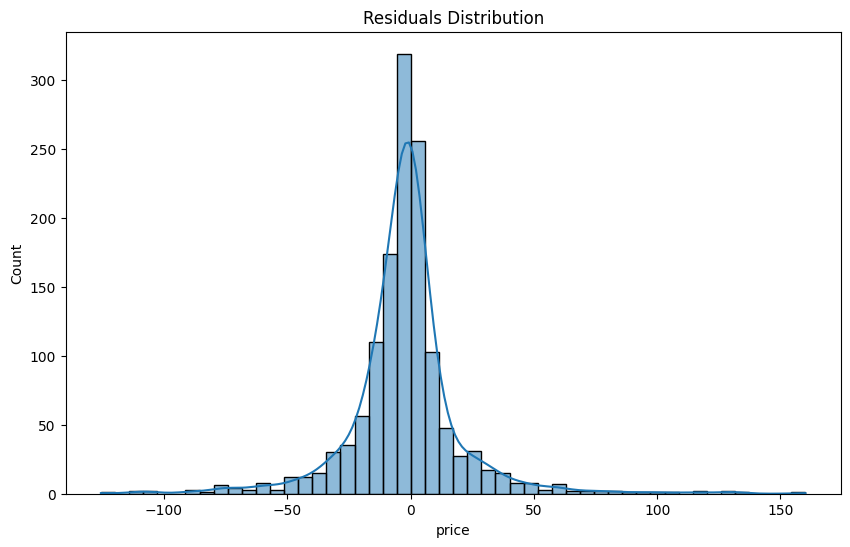

In [ ]:
residuals = y_test - y_pred #error
sns.histplot(residuals, bins=50, kde=True)
plt.title("Residuals Distribution")
plt.show()

In [237]:
def predict_price(location, sqft, bath, bhk):
    x = np.zeros(len(X.columns))
    try:
        x[X.columns.get_loc("bhk")] = bhk
        x[X.columns.get_loc("total_sqft")] = sqft
        x[X.columns.get_loc("bath")] = bath

        if location in X.columns:
            x[X.columns.get_loc(location)] = 1

        prediction = rfr.predict([x])[0]
        print("Prediction: ", prediction)
        return max(0, round(prediction, 2))

    except Exception as e:
        print("Error", e)
        return "Failed"

In [238]:
predict_price("HSR Layout", 2000, 2, 3)

Prediction:  168.2416577246283


c:\Users\Manan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


np.float64(168.24)

In [239]:
predict_price("Hebbal", 2000, 3, 3)

Prediction:  171.5190379555085


c:\Users\Manan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


np.float64(171.52)

In [240]:
predict_price("Whitefield", 1500, 2, 2)

Prediction:  115.67441666666669


c:\Users\Manan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


np.float64(115.67)

Export the model using joblib/pickle so it can be used later

In [243]:
import pickle

with open("BHP_using_RFR.pickle", 'wb') as f:
    pickle.dump(rfr, f)

In [244]:
import json

columns = {
    'data_columns' : [col.lower() for col in X.columns]
}

with open("columns.json", "w") as f:
    f.write (json.dumps(columns))